# Proyek Akhir: Menyelesaikan Permasalahan Perusahaan Edutech
* Nama : Seprianto Sianipar
* Email : raysianipar15@gmail.com
* Id Dicoding : seprianto15

## Persiapan

### Menyiapkan library yang dibutuhkan

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
import os
from sklearn.preprocessing import LabelEncoder, StandardScaler
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from imblearn.over_sampling import SMOTE

### Menyiapkan data yang akan diguankan

In [49]:
# Load dataset dengan menambahkan keyword argument sep=';'

URL = 'https://raw.githubusercontent.com/dicodingacademy/dicoding_dataset/refs/heads/main/students_performance/data.csv'
df = pd.read_csv(URL, sep=';')
df.head(5)

,Marital_status,Application_mode,Application_order,Course,Daytime_evening_attendance,Previous_qualification,Previous_qualification_grade,Nacionality,Mothers_qualification,Fathers_qualification,...,Curricular_units_2nd_sem_credited,Curricular_units_2nd_sem_enrolled,Curricular_units_2nd_sem_evaluations,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Curricular_units_2nd_sem_without_evaluations,Unemployment_rate,Inflation_rate,GDP,Status
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


## Data Understanding

In [50]:
# Tinjau jumlah baris, kolom dan jenis data

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Marital_status                                4424 non-null   int64  
 1   Application_mode                              4424 non-null   int64  
 2   Application_order                             4424 non-null   int64  
 3   Course                                        4424 non-null   int64  
 4   Daytime_evening_attendance                    4424 non-null   int64  
 5   Previous_qualification                        4424 non-null   int64  
 6   Previous_qualification_grade                  4424 non-null   float64
 7   Nacionality                                   4424 non-null   int64  
 8   Mothers_qualification                         4424 non-null   int64  
 9   Fathers_qualification                         4424 non-null   i

In [51]:
# Menampilkan statistik deskriptif dataset dengan menjalankan describe

df.describe().T

,count,mean,std,min,25%,50%,75%,max
Marital_status,4424.0,1.178571,0.605747,1.00,1.00,1.000000,1.000000,6.000000
Application_mode,4424.0,18.669078,17.484682,1.00,1.00,17.000000,39.000000,57.000000
Application_order,4424.0,1.727848,1.313793,0.00,1.00,1.000000,2.000000,9.000000
Course,4424.0,8856.642631,2063.566416,33.00,9085.00,9238.000000,9556.000000,9991.000000
Daytime_evening_attendance,4424.0,0.890823,0.311897,0.00,1.00,1.000000,1.000000,1.000000
Previous_qualification,4424.0,4.577758,10.216592,1.00,1.00,1.000000,1.000000,43.000000
Previous_qualification_grade,4424.0,132.613314,13.188332,95.00,125.00,133.100000,140.000000,190.000000
Nacionality,4424.0,1.873192,6.914514,1.00,1.00,1.000000,1.000000,109.000000
Mothers_qualification,4424.0,19.561935,15.603186,1.00,2.00,19.000000,37.000000,44.000000
Fathers_qualification,4424.0,22.275316,15.343108,1.00,3.00,19.000000,37.000000,44.000000


In [52]:
# Tinjau duplikasi data

print('Jumlah duplikasi:', df.duplicated().sum())

Jumlah duplikasi: 0


In [53]:
# Membagi column menjadi feature numerik dan categorical

# Define category features
categorical_features = [
    'Marital_status',
    'Application_mode',
    'Course',
    'Daytime_evening_attendance',
    'Previous_qualification',
    'Nacionality',
    'Mothers_qualification',
    'Fathers_qualification',
    'Mothers_occupation',
    'Fathers_occupation',
    'Gender',
    'Age_at_enrollment',
    'Status'
]

# Define numerical features
numerical_features = [col for col in df.columns if col not in categorical_features]


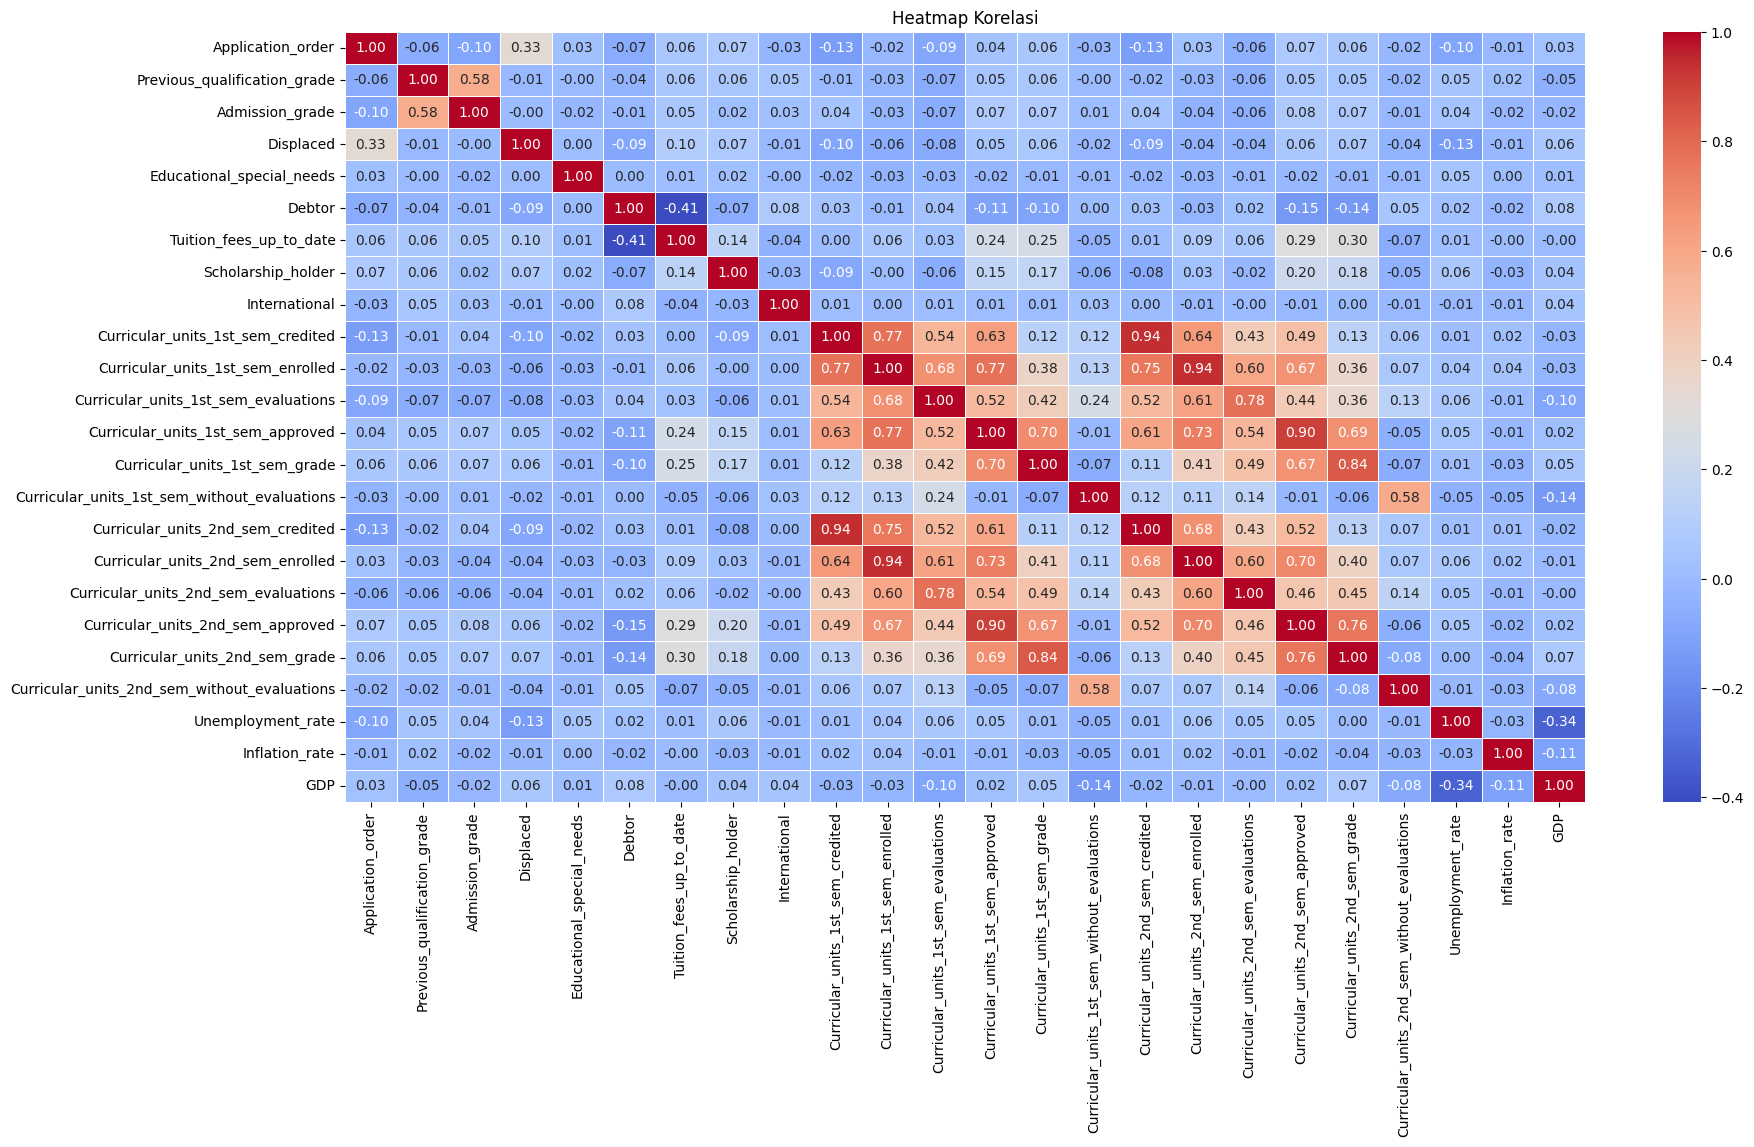

In [54]:
# Menampilkan korelasi antar fitur numerik

plt.figure(figsize=(20, 10))
correlation_matrix = df[numerical_features].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Heatmap Korelasi')
plt.show()

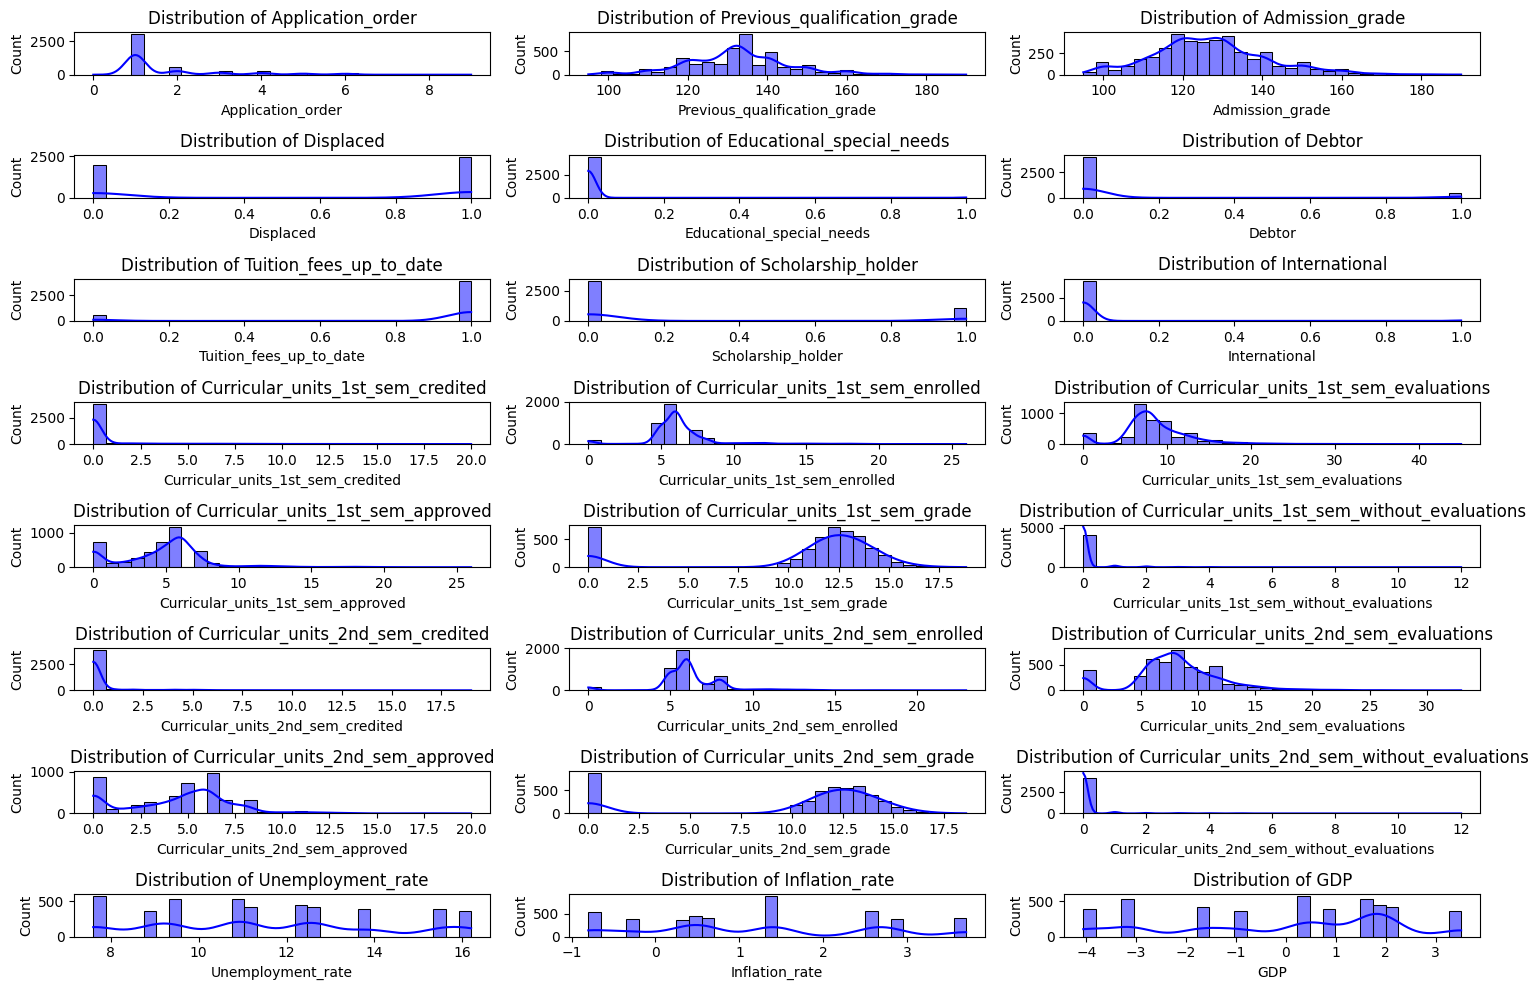

In [55]:
# Distribusi fitur numerik

n_feature = len(numerical_features)
n_cols = 3
n_row = (n_feature + n_cols - 1) // n_cols

plt.figure(figsize=(15, 10))
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(n_row, n_cols, i)
    sns.histplot(df[feature], bins=30, kde=True, color='blue')
    plt.title(f'Distribution of {feature}')
plt.tight_layout()
plt.show()

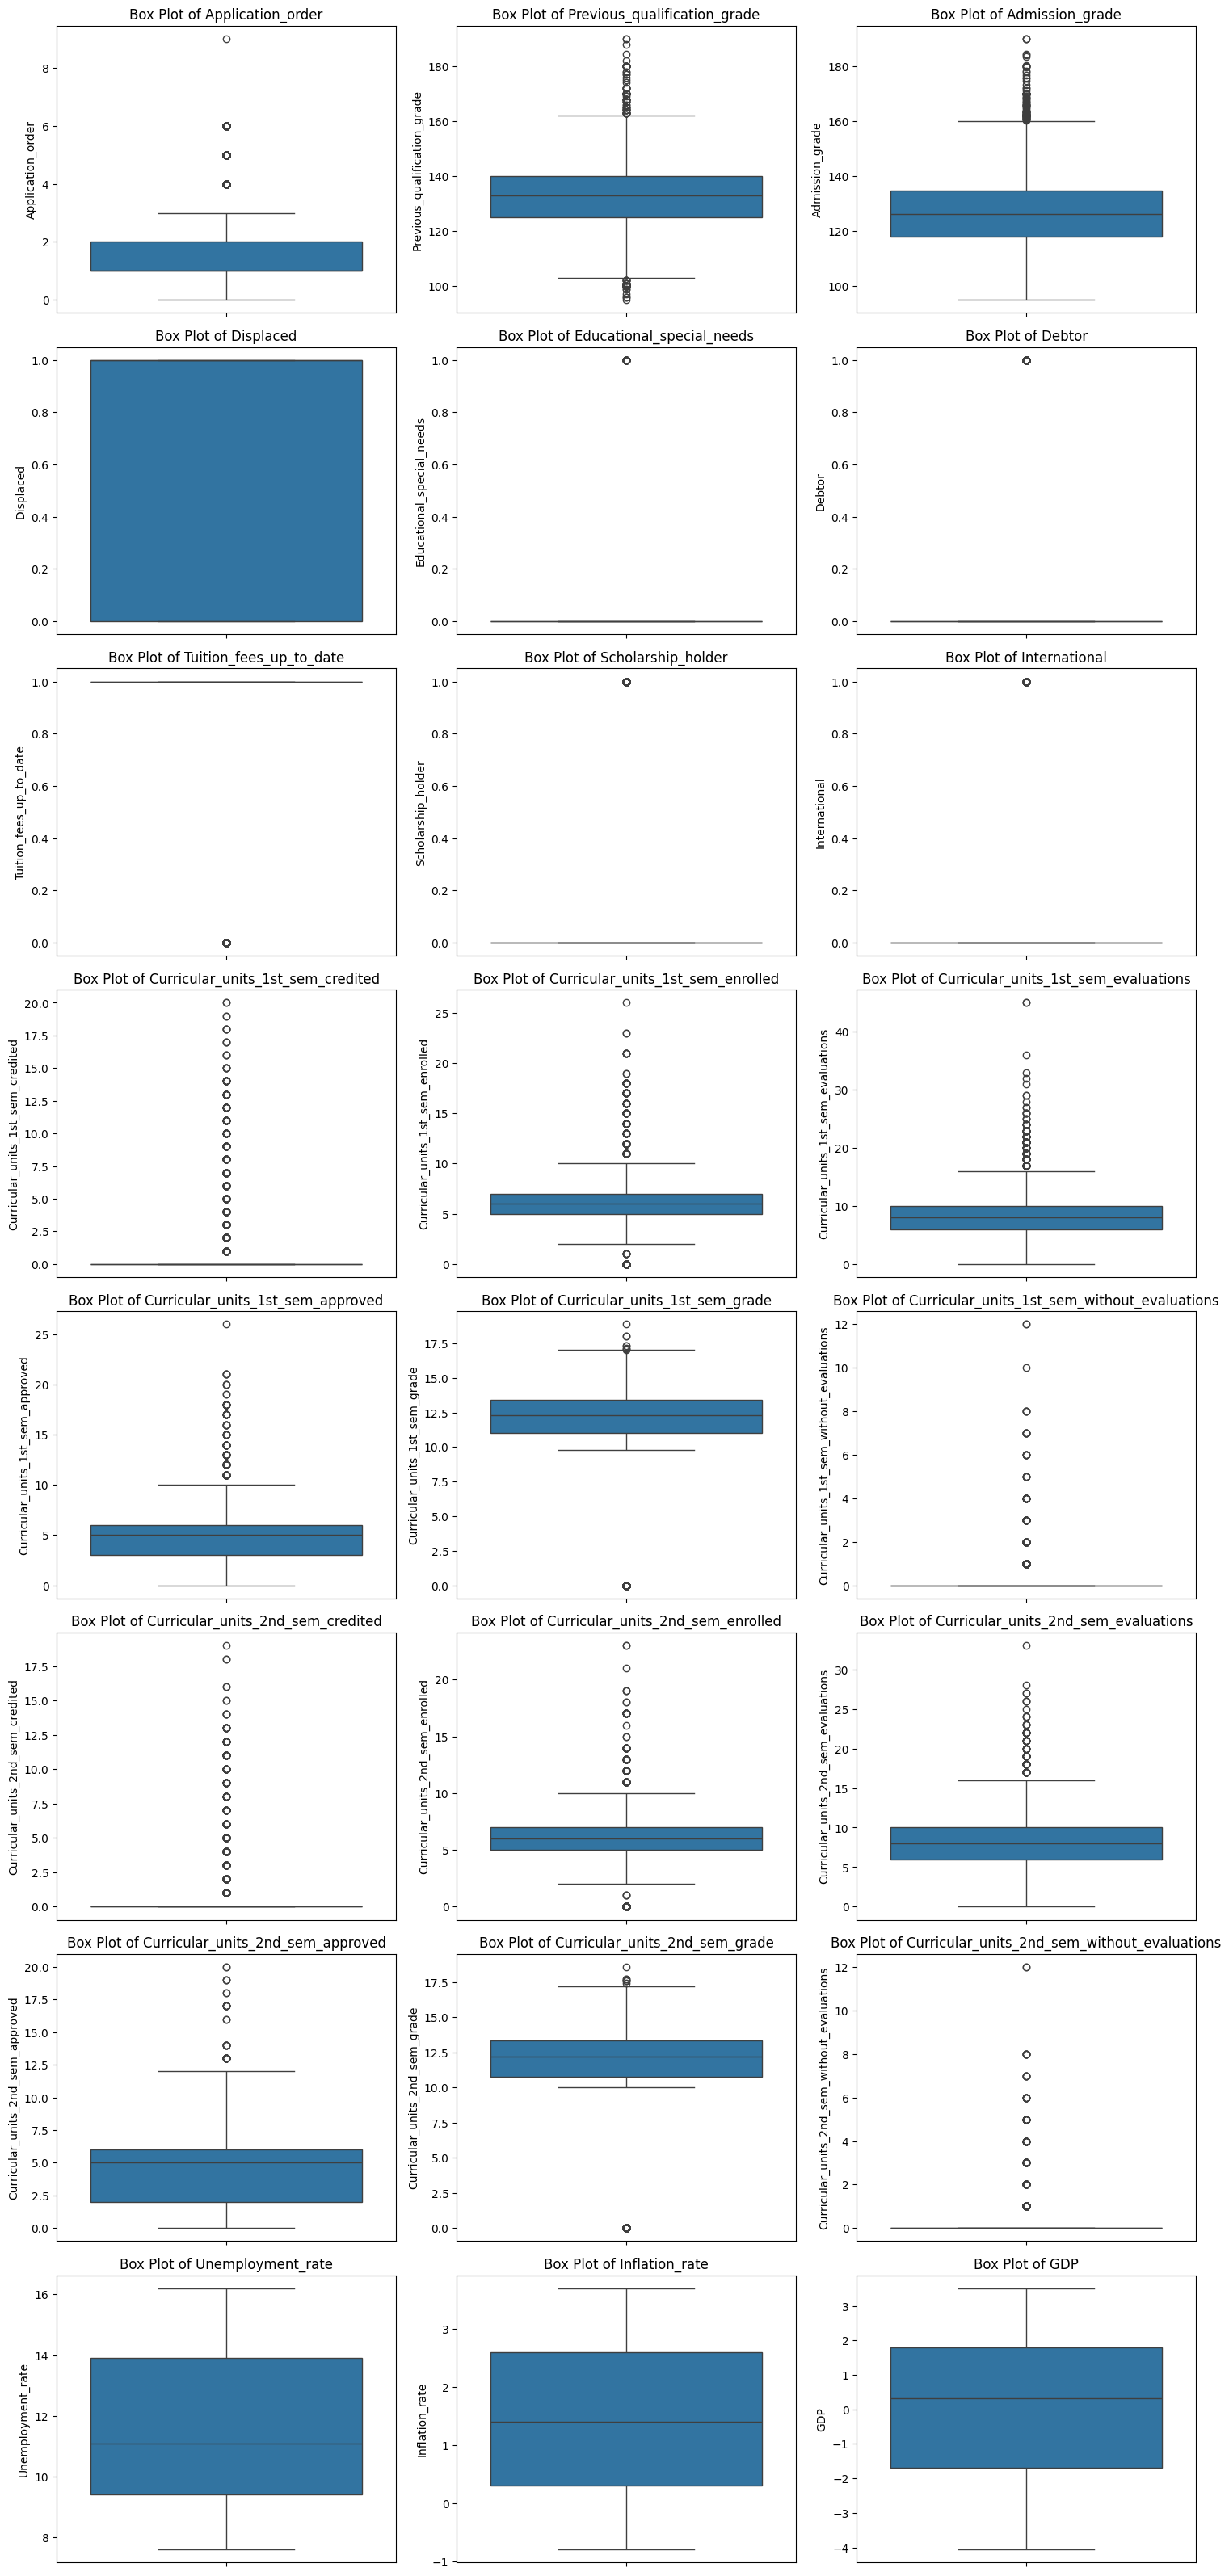

In [56]:
# Identify outlier fitur numerik menggunakan box plot

cols = 3
rows = n_row = (n_feature + n_cols - 1) // n_cols

plt.figure(figsize=(15, rows * 4))

for i, feature in enumerate(numerical_features):
    plt.subplot(rows, cols, i + 1)
    sns.boxplot(y=df[feature]) 
    plt.title(f'Box Plot of {feature}')

plt.tight_layout()
plt.show()

## Data Preparation / Preprocessing

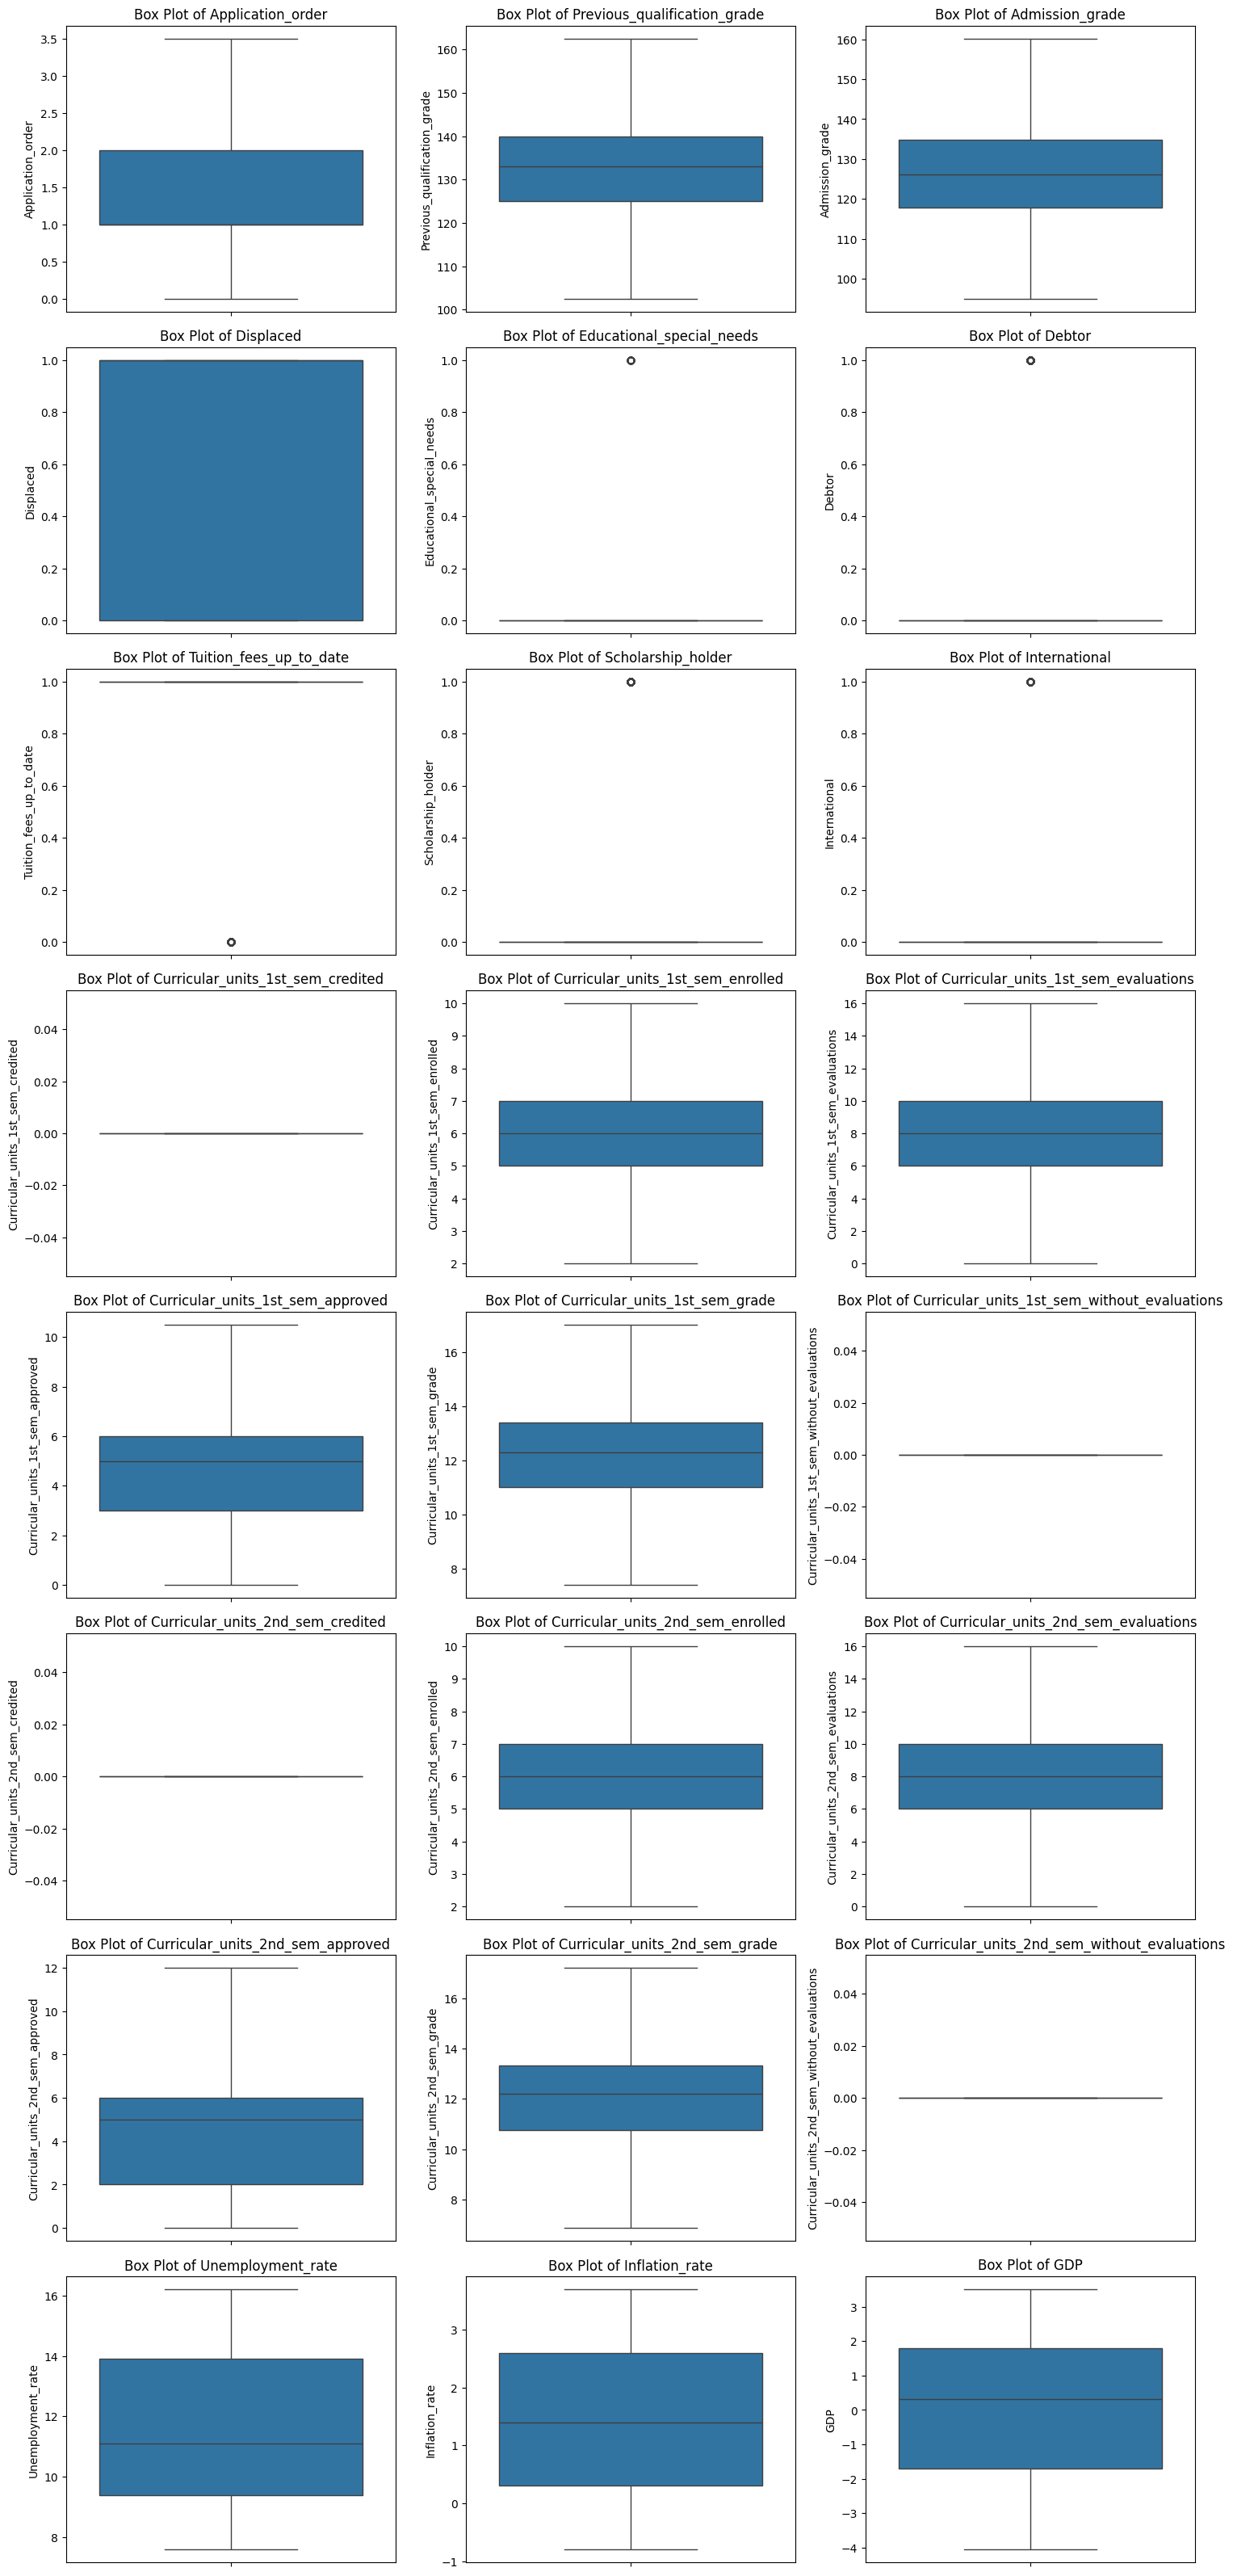

In [57]:
# Cleaning numerical features by removing outliers

# List column to be cleaned of outlier
cols_to_clean = [
    'Application_order',
    'Previous_qualification_grade',
    'Admission_grade',
    'Curricular_units_1st_sem_credited',
    'Curricular_units_1st_sem_enrolled',
    'Curricular_units_1st_sem_evaluations',
    'Curricular_units_1st_sem_approved',
    'Curricular_units_1st_sem_grade',
    'Curricular_units_1st_sem_without_evaluations',
    'Curricular_units_2nd_sem_credited',
    'Curricular_units_2nd_sem_enrolled',
    'Curricular_units_2nd_sem_evaluations',
    'Curricular_units_2nd_sem_approved',
    'Curricular_units_2nd_sem_grade',
    'Curricular_units_2nd_sem_without_evaluations'
]

# Menghitung Q1, Q3, dan IQR
Q1 = df[cols_to_clean].quantile(0.25)
Q3 = df[cols_to_clean].quantile(0.75)
IQR = Q3 - Q1

# Menentukan batas bawah dan atas
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Menggunakan metode clipping untuk menangani outlier
df[cols_to_clean] = df[cols_to_clean].clip(lower=lower_bound, upper=upper_bound, axis=1)

# Tinjau ulang box plot setelah penanganan outlier
cols = 3
rows = n_row = (n_feature + n_cols - 1) // n_cols

plt.figure(figsize=(15, rows * 4))

for i, feature in enumerate(numerical_features):
    plt.subplot(rows, cols, i + 1)
    sns.boxplot(y=df[feature]) 
    plt.title(f'Box Plot of {feature}')

plt.tight_layout()
plt.show()

In [58]:
# Bining column Marital_status
bins_marital_status = [1,2,3,4,5,6,7]
labels_marital_status = ['single', 'married', 'widower', 'divorced', 'factounion', 'legally separated']
df['Marital_Status'] = pd.cut(df['Marital_status'], bins=bins_marital_status, labels=labels_marital_status, right=False)

In [59]:
# Bining column Application_mode
bins_app_mode = [1,2,5,7,10,15,16,17,18,26,27,39,42,43,44,51,53,57,60]
labels_marital_status = [
    '1st phase - general contingent',
    'Ordinance No. 612/93',
    '1st phase - special contingent (Azores Island)',
    'Holders of other higher courses',
    'Ordinance No. 854-B/99',
    'International student (bachelor)',
    '1st phase - special contingent (Madeira Island)',
    '2nd phase - general contingent',
    '3rd phase - general contingent',
    'Ordinance No. 533-A/99, item b2) (Different Plan)',
    'Ordinance No. 533-A/99, item b3 (Other Institution)',
    'Over 23 years old',
    'Transfer',
    'Change of course',
    'Technological specialization diploma holders',
    'Change of institution/course',
    'Short cycle diploma holders',
    'Change of institution/course (International)'
]
df['Application_Mode'] = pd.cut(df['Application_mode'], bins=bins_app_mode, labels=labels_marital_status, right=False)

In [60]:
# Bining column Course
bins_course = [33,171,8014,9003,9070,9085,9119,9130,9147,9238,9254,9500,9556,9670,9773,9853,9991,10000]
labels_course = [
    'Biofuel Production Technologies',
    'Animation and Multimedia Design',
    'Social Service (evening attendance)',
    'Agronomy',
    'Communication Design',
    'Veterinary Nursing',
    'Informatics Engineering',
    'Equinculture',
    'Management',
    'Social Service',
    'Tourism',
    'Nursing',
    'Oral Hygiene',
    'Advertising and Marketing Management',
    'Journalism and Communication',
    'Basic Education',
    'Management (evening attendance)'
]
df['course'] = pd.cut(df['Course'], bins=bins_course, labels=labels_course, right=False)

In [61]:
# Transform Daytime_evening_attendance (1: DayTime, 0: Evening) 
df['Schedule'] = df['Daytime_evening_attendance'].apply(lambda x: 'DayTime' if x == 1 else 'Evening')

# Transform Gender (1: Male, 0: Female)
df['Gender'] = df['Gender'].map({1: 'Male', 0: 'Female'})

In [62]:
# Bining column Previous_qualification
bins_prev = [0,6,15,39,45]
labels_prev = ['Senior High School', 'Associate Degree', 'Bachelor Degree', 'Master Degree']
df['Previous_Qualification'] = pd.cut(df['Previous_qualification'], bins=bins_prev, labels=labels_prev, right=True)

In [63]:
# Bining column Nacionality
bins_nacionality = [1,2,6,11,13,14,17,21,22,24,25,26,32,41,62,100,101,103,105,108,109,110]
labels_nacionality = ['Portuguese', 'German', 'Spanish', 'Italian', 'Dutch', 'English', 'Lithuanian',
                      'Angolan', 'Cape Verdean', 'Guinean', 'Mozambican', 'Santomean', 'Turkish',
                      'Brazilian', 'Romanian', 'Moldova (Republic of)', 'Mexican', 'Ukrainian', 'Russian', 
                      'Cuban', 'Colombian'
                      ]
df['Nacionality_Category'] = pd.cut(df['Nacionality'], bins=bins_nacionality, labels=labels_nacionality, right=False)


In [64]:
# Bining coloumn Mothers_qualification
bins_mothers = [0,6,15,39,45]
labels_mothers = ['Senior High School', 'Associate Degree', 'Bachelor Degree', 'Master Degree']
df['Mothers_Qualification'] = pd.cut(df['Mothers_qualification'], bins=bins_mothers, labels=labels_mothers, right=True)

In [65]:
# Bining column Fathers_qualification
bins_fathers = [0,6,15,39,45]
labels_fathers = ['Senior High School', 'Associate Degree', 'Bachelor Degree', 'Master Degree']
df['Fathers_Qualification'] = pd.cut(df['Fathers_qualification'], bins=bins_fathers, labels=labels_fathers, right=True)

In [66]:
# Bining column Mother_occupation
bins_mother_occupation = [0,11,91,131,200]
labels_mother_occupation = ['Homemaker', 'Blue Collar', 'White Collar','Professional']
df['Mothers_Occupation'] = pd.cut(df['Mothers_occupation'], bins=bins_mother_occupation, labels=labels_mother_occupation, right=False)

In [67]:
# Bining column Father_occupation
bins_father_occupation = [0,11,91,131,200]
labels_father_occupation = ['Professional', 'White Collar', 'Blue Collar','Unemployed']
df['Fathers_Occupation'] = pd.cut(df['Fathers_occupation'], bins=bins_father_occupation, labels=labels_father_occupation, right=False)

In [68]:
# Bining column Age_at_enrollment
bins_age = [16, 26, 36, 46, 55, 70] 
labels_age = ['17-25', '26-35', '36-45', '46-55', '55+']
df['AgeGroup'] = pd.cut(df['Age_at_enrollment'], bins=bins_age, labels=labels_age, right=True)

In [69]:
# Tinjau jumlah baris, kolom dan jenis data column categorical_features
df[categorical_features].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Marital_status              4424 non-null   int64 
 1   Application_mode            4424 non-null   int64 
 2   Course                      4424 non-null   int64 
 3   Daytime_evening_attendance  4424 non-null   int64 
 4   Previous_qualification      4424 non-null   int64 
 5   Nacionality                 4424 non-null   int64 
 6   Mothers_qualification       4424 non-null   int64 
 7   Fathers_qualification       4424 non-null   int64 
 8   Mothers_occupation          4424 non-null   int64 
 9   Fathers_occupation          4424 non-null   int64 
 10  Gender                      4424 non-null   object
 11  Age_at_enrollment           4424 non-null   int64 
 12  Status                      4424 non-null   object
dtypes: int64(11), object(2)
memory usage: 449.4+ KB


In [70]:
# Drop column feature categorical (Dtype int)
categorical_to_drop = [
    'Marital_status',
    'Application_mode',
    'Course',
    'Daytime_evening_attendance',
    'Previous_qualification',
    'Nacionality',
    'Mothers_qualification',
    'Fathers_qualification',
    'Mothers_occupation',
    'Fathers_occupation',
    'Age_at_enrollment'
]

# Menghapus kolom dari DataFrame asli
df.drop(columns=categorical_to_drop, inplace=True, errors='ignore')


In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                        Non-Null Count  Dtype   
---  ------                                        --------------  -----   
 0   Application_order                             4424 non-null   float64 
 1   Previous_qualification_grade                  4424 non-null   float64 
 2   Admission_grade                               4424 non-null   float64 
 3   Displaced                                     4424 non-null   int64   
 4   Educational_special_needs                     4424 non-null   int64   
 5   Debtor                                        4424 non-null   int64   
 6   Tuition_fees_up_to_date                       4424 non-null   int64   
 7   Gender                                        4424 non-null   object  
 8   Scholarship_holder                            4424 non-null   int64   
 9   International                                 4424 n

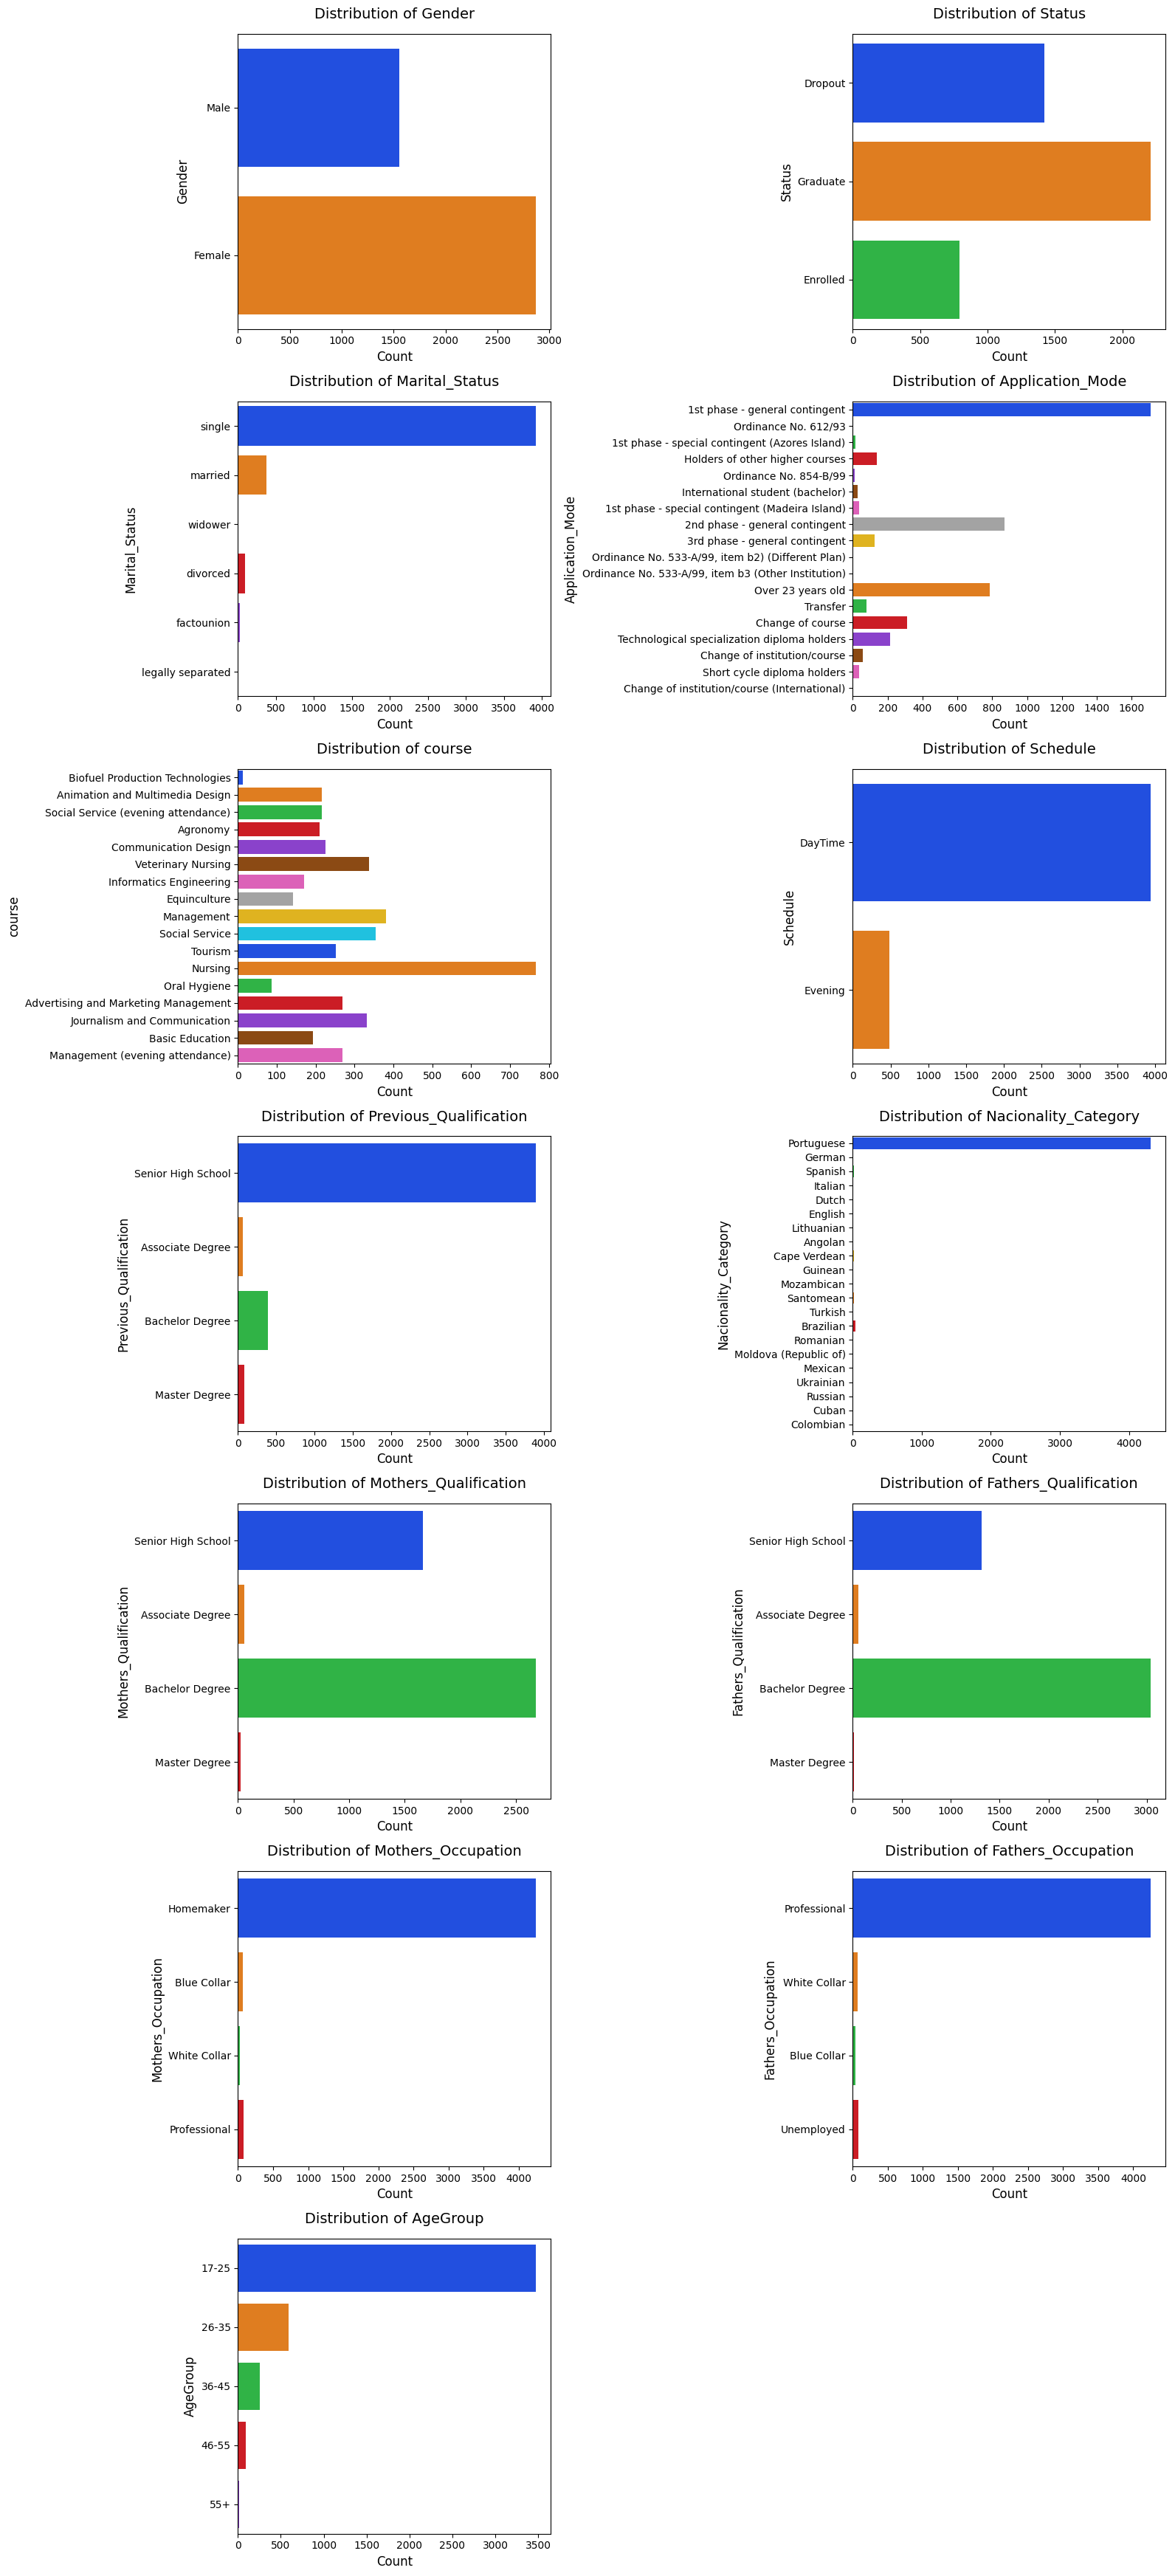

In [72]:
# Distribusi fitur kategorikal
categorical_features = df.select_dtypes(include=['object', 'category']).columns

n_feature_cat = len(categorical_features)
n_cols_cat = 2
n_row_cat = (n_feature_cat + n_cols_cat - 1) // n_cols_cat

plt.figure(figsize=(16, 5 * n_row_cat)) 

for i, feature in enumerate(categorical_features, 1):
    plt.subplot(n_row_cat, n_cols_cat, i)
    
    ax = sns.countplot(y=df[feature], 
                      hue=df[feature], 
                      palette='bright', 
                      legend=False)
    
    plt.title(f'Distribution of {feature}', fontsize=14, pad=15)
    plt.xlabel('Count', fontsize=12)
    plt.ylabel(feature, fontsize=12)

plt.subplots_adjust(hspace=0.5, wspace=0.5) 
plt.tight_layout()
plt.show()

In [73]:
# Simpan DataFrame ke csv
df.to_csv('data_student.csv', index=False)

In [74]:
# Copy dataframe untuk analisis lebih lanjut
df_used = df.copy()

In [75]:
# Tinjau stastistik dataframe
df_used.describe(include='all')

,Application_order,Previous_qualification_grade,Admission_grade,Displaced,Educational_special_needs,Debtor,Tuition_fees_up_to_date,Gender,Scholarship_holder,International,...,Application_Mode,course,Schedule,Previous_Qualification,Nacionality_Category,Mothers_Qualification,Fathers_Qualification,Mothers_Occupation,Fathers_Occupation,AgeGroup
count,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424,4424.000000,4424.000000,...,4424,4424,4424,4424,4424,4424,4424,4424,4424,4424
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,NaN,...,18,17,2,4,21,4,4,4,4,5
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Female,NaN,NaN,...,1st phase - general contingent,Nursing,DayTime,Senior High School,Portuguese,Bachelor Degree,Bachelor Degree,Homemaker,Professional,17-25
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2868,NaN,NaN,...,1708,766,3941,3891,4314,2678,3040,4242,4247,3473
mean,1.568829,132.501831,126.808816,0.548373,0.011528,0.113698,0.880651,NaN,0.248418,0.024864,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,0.918791,12.592465,13.996731,0.497711,0.106760,0.317480,0.324235,NaN,0.432144,0.155729,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,0.000000,102.500000,95.000000,0.000000,0.000000,0.000000,0.000000,NaN,0.000000,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,1.000000,125.000000,117.900000,0.000000,0.000000,0.000000,1.000000,NaN,0.000000,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,1.000000,133.100000,126.100000,1.000000,0.000000,0.000000,1.000000,NaN,0.000000,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,2.000000,140.000000,134.800000,1.000000,0.000000,0.000000,1.000000,NaN,0.000000,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [76]:
# Define Label Encoding pada column Status agar menjadi numerik

label_encoder = LabelEncoder()
df_used['Status'] = label_encoder.fit_transform(df_used['Status'])

In [77]:
# Tinjau jumlah baris, kolom dan jenis data
df_used.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                        Non-Null Count  Dtype   
---  ------                                        --------------  -----   
 0   Application_order                             4424 non-null   float64 
 1   Previous_qualification_grade                  4424 non-null   float64 
 2   Admission_grade                               4424 non-null   float64 
 3   Displaced                                     4424 non-null   int64   
 4   Educational_special_needs                     4424 non-null   int64   
 5   Debtor                                        4424 non-null   int64   
 6   Tuition_fees_up_to_date                       4424 non-null   int64   
 7   Gender                                        4424 non-null   object  
 8   Scholarship_holder                            4424 non-null   int64   
 9   International                                 4424 n

In [78]:
# Use one-hot encoding untuk fitur kategorikal

categorical_features = df_used.select_dtypes(include=['object', 'category']).columns

# Gunakan 'pd.get_dummies' untuk melakukan OneHotEncoding
df_encoded = pd.get_dummies(
    df_used,
    columns = categorical_features,
    drop_first = True,
    dtype=int
)

# Tampilkan 5 baris pertama untuk memverifikasi hasilnya
df_encoded.head(5)

,Application_order,Previous_qualification_grade,Admission_grade,Displaced,Educational_special_needs,Debtor,Tuition_fees_up_to_date,Scholarship_holder,International,Curricular_units_1st_sem_credited,...,Mothers_Occupation_Blue Collar,Mothers_Occupation_White Collar,Mothers_Occupation_Professional,Fathers_Occupation_White Collar,Fathers_Occupation_Blue Collar,Fathers_Occupation_Unemployed,AgeGroup_26-35,AgeGroup_36-45,AgeGroup_46-55,AgeGroup_55+
0,3.5,122.0,127.3,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1.0,160.0,142.5,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3.5,122.0,124.8,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2.0,122.0,119.6,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1.0,102.5,141.5,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [79]:
# Pisahkan status dan fitur

X = df_encoded.drop(['Status'], axis=1)
y = df_encoded['Status']

# Melihat distribusi kelas
print("Distribusi kelas sebelum SMOTE:", Counter(y))

Distribusi kelas sebelum SMOTE: Counter({2: 2209, 0: 1421, 1: 794})


In [80]:
# Menggunakan train_test_split() untuk melakukan pembagian dataset.

# Panggil fungsi untuk membagi data.
#  - Gunakan 'stratify=y' agar proporsi kelas di train/test set sama.
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size = 0.2,
    random_state = 42,
    stratify = y
)

# Tampilkan jumlah data pada masing-masing set
print("Jumlah data total: ",len(X))
print("Jumlah data latih: ",len(X_train))
print("Jumlah data test: ",len(X_test))

Jumlah data total:  4424
Jumlah data latih:  3539
Jumlah data test:  885


In [81]:
# ------------------- Embedded Methods -------------------
# Menggunakan Random Forest untuk mendapatkan fitur penting
rf_model = RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state=42)
rf_model.fit(X_train, y_train)

# Mendapatkan fitur penting
importances = rf_model.feature_importances_
indices = np.argsort(importances)[::-1]  

# Menentukan ambang batas untuk fitur penting
threshold = 0.03  # ambang batas 3%
important_features_indices = [i for i in range(len(importances)) if importances[i] >= threshold]

# Mencetak fitur yang dipilih
print("Fitur yang dipilih dengan Embedded Methods (di atas ambang batas):")
for i in important_features_indices:
    print(f"{X_train.columns[i]}: {importances[i]}")

# Mendapatkan nama kolom penting berdasarkan importance
important_features = X_train.columns[important_features_indices]

# Memindahkan fitur penting ke variabel baru
X_important = X_train[important_features]  # Hanya fitur penting dari data pelatihan
X_test_important = X_test[important_features]  # Hanya fitur penting dari data pengujian

# X_important sekarang berisi hanya fitur penting
print("\nDimensi data pelatihan dengan fitur penting:", X_important.shape)
print("Dimensi data pengujian dengan fitur penting:", X_test_important.shape)

Fitur yang dipilih dengan Embedded Methods (di atas ambang batas):
Previous_qualification_grade: 0.049033124678065726
Admission_grade: 0.05671527814016202
Tuition_fees_up_to_date: 0.03547558601170845
Curricular_units_1st_sem_evaluations: 0.04634998676362346
Curricular_units_1st_sem_approved: 0.07475870771922613
Curricular_units_1st_sem_grade: 0.0722192650728192
Curricular_units_2nd_sem_evaluations: 0.05027649637330534
Curricular_units_2nd_sem_approved: 0.11279030860240613
Curricular_units_2nd_sem_grade: 0.09638457823270274
Unemployment_rate: 0.03026285439685366
GDP: 0.03268891210402894

Dimensi data pelatihan dengan fitur penting: (3539, 11)
Dimensi data pengujian dengan fitur penting: (885, 11)


In [82]:
X_important.describe(include='all')

,Previous_qualification_grade,Admission_grade,Tuition_fees_up_to_date,Curricular_units_1st_sem_evaluations,Curricular_units_1st_sem_approved,Curricular_units_1st_sem_grade,Curricular_units_2nd_sem_evaluations,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Unemployment_rate,GDP
count,3539.000000,3539.000000,3539.000000,3539.000000,3539.000000,3539.000000,3539.000000,3539.000000,3539.000000,3539.000000,3539.000000
mean,132.563436,126.698658,0.881605,8.128285,4.580531,11.838960,7.942074,4.402374,11.573162,11.580136,0.018632
std,12.592475,14.016350,0.323121,3.691685,2.729285,2.319776,3.692656,2.921481,2.642617,2.660350,2.271754
min,102.500000,95.000000,0.000000,0.000000,0.000000,7.400000,0.000000,0.000000,6.875000,7.600000,-4.060000
25%,125.000000,117.800000,1.000000,6.000000,3.000000,11.000000,6.000000,2.000000,10.775000,9.400000,-1.700000
50%,133.100000,126.000000,1.000000,8.000000,5.000000,12.320000,8.000000,5.000000,12.200000,11.100000,0.320000
75%,140.000000,134.900000,1.000000,10.000000,6.000000,13.399000,10.000000,6.000000,13.333333,13.900000,1.790000
max,162.500000,160.150000,1.000000,16.000000,10.500000,17.000000,16.000000,12.000000,17.208333,16.200000,3.510000


In [83]:
# Inisialisasi Scaler
scaler = StandardScaler()

# Fit & Transform pada data Train asli (X_important)
X_train_scaled = scaler.fit_transform(X_important)

# Transform pada data Test (X_test_important)
X_test_final = scaler.transform(X_test_important)

# Mengubah hasil menjadi DataFrame untuk analisis lebih lanjut
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_important.columns)
X_test_final = pd.DataFrame(X_test_final, columns=X_test_important.columns)

In [84]:
# Inisialisasi SMOTE
smote = SMOTE(random_state=42)

# Fit dan Resample pada data yang sudah diseleksi fiturnya
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_scaled, y_train)

# Menampilkan distribusi kelas setelah SMOTE
print("Distribusi kelas setelah SMOTE:", Counter(y_train_resampled))

# Mengubah hasil menjadi DataFrame
X_train_resampled = pd.DataFrame(X_train_resampled, columns=X_important.columns)
y_train_resampled = pd.Series(y_train_resampled, name='Status')

Distribusi kelas setelah SMOTE: Counter({2: 1767, 0: 1767, 1: 1767})


## Modeling

In [85]:
# Mencari Hyperparameter terbaik dengan algoritma RandomForest

# Inisialisasi Model
rdf_model = RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state=42)

# Define hyperparameter untuk optimasi model
param_grid_rdf = { 
    'n_estimators': [200, 500],
    'max_features': ['sqrt', 'log2'],
    'max_depth' : list(range(5, 16, 2)),
    'criterion' :['gini', 'entropy']
}

# Membuat (instantiate) objek dari algoritma tuning
CV_rdf = GridSearchCV(estimator=rdf_model, param_grid=param_grid_rdf, cv=5, n_jobs=-1)

# Eksekusi pencarian parameter optimal menggunakan data latih hasil resample (SMOTE) 
CV_rdf.fit(X_train_resampled, y_train_resampled)

,"estimator estimator: estimator objectThis is assumed to implement the scikit-learn estimator interface.Either estimator needs to provide a ``score`` function,or ``scoring`` must be passed.",RandomForestC...ndom_state=42)
,"param_grid param_grid: dict or list of dictionariesDictionary with parameters names (`str`) as keys and lists ofparameter settings to try as values, or a list of suchdictionaries, in which case the grids spanned by each dictionaryin the list are explored. This enables searching over any sequenceof parameter settings.","{'criterion': ['gini', 'entropy'], 'max_depth': [5, 7, ...], 'max_features': ['sqrt', 'log2'], 'n_estimators': [200, 500]}"
,"scoring scoring: str, callable, list, tuple or dict, default=NoneStrategy to evaluate the performance of the cross-validated model onthe test set.If `scoring` represents a single score, one can use:- a single string (see :ref:`scoring_string_names`);- a callable (see :ref:`scoring_callable`) that returns a single value;- `None`, the `estimator`'s :ref:`default evaluation criterion ` is used.If `scoring` represents multiple scores, one can use:- a list or tuple of unique strings;- a callable returning a dictionary where the keys are the metric names and the values are the metric scores;- a dictionary with metric names as keys and callables as values.See :ref:`multimetric_grid_search` for an example.",None
,"n_jobs n_jobs: int, default=NoneNumber of jobs to run in parallel.``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.``-1`` means using all processors. See :term:`Glossary `for more details... versionchanged:: v0.20 `n_jobs` default changed from 1 to None",-1
,"refit refit: bool, str, or callable, default=TrueRefit an estimator using the best found parameters on the wholedataset.For multiple metric evaluation, this needs to be a `str` denoting thescorer that would be used to find the best parameters for refittingthe estimator at the end.Where there are considerations other than maximum score inchoosing a best estimator, ``refit`` can be set to a function whichreturns the selected ``best_index_`` given ``cv_results_``. In thatcase, the ``best_estimator_`` and ``best_params_`` will be setaccording to the returned ``best_index_`` while the ``best_score_``attribute will not be available.The refitted estimator is made available at the ``best_estimator_``attribute and permits using ``predict`` directly on this``GridSearchCV`` instance.Also for multiple metric evaluation, the attributes ``best_index_``,``best_score_`` and ``best_params_`` will only be available if``refit`` is set and all of them will be determined w.r.t this specificscorer.See ``scoring`` parameter to know more about multiple metricevaluation.See :ref:`sphx_glr_auto_examples_model_selection_plot_grid_search_digits.py`to see how to design a custom selection strategy using a callablevia `refit`.See :ref:`this example`for an example of how to use ``refit=callable`` to balance modelcomplexity and cross-validated score... versionchanged:: 0.20 Support for callable added.",True
,"cv cv: int, cross-validation generator or an iterable, default=NoneDetermines the cross-validation splitting strategy.Possible inputs for cv are:- None, to use the default 5-fold cross validation,- integer, to specify the number of folds in a `(Stratified)KFold`,- :term:`CV splitter`,- An iterable yielding (train, test) splits as arrays of indices.For integer/None inputs, if the estimator is a classifier and ``y`` iseither binary or multiclass, :class:`StratifiedKFold` is used. In allother cases, :class:`KFold` is used. These splitters are instantiatedwith `shuffle=False` so the splits will be the same across calls.Refer :ref:`User Guide ` for the variouscross-validation strategies that can be used here... versionchanged:: 0.22 ``cv`` default value if None changed from 3-fold to 5-fold.",5
,"verbose verbose: intControls the verbosity: the higher, the more messages.- >1 : the computation time for each fold and parameter 

In [86]:
print("best parameters rdf_model : ", CV_rdf.best_params_)

best parameters rdf_model :  {'criterion': 'entropy', 'max_depth': 15, 'max_features': 'sqrt', 'n_estimators': 200}


In [87]:
# Melatih model dengan menggunakan alogritma RandomForest
rdf_model = RandomForestClassifier(
    random_state=42, 
    max_depth=15, 
    n_estimators=200, 
    max_features='sqrt',
    min_samples_leaf=1,  
    criterion='entropy',  
    n_jobs=-1
)
rdf_model.fit(X_train_resampled, y_train_resampled)

,"n_estimators n_estimators: int, default=100The number of trees in the forest... versionchanged:: 0.22 The default value of ``n_estimators`` changed from 10 to 100 in 0.22.",200
,"criterion criterion: {""gini"", ""entropy"", ""log_loss""}, default=""gini""The function to measure the quality of a split. Supported criteria are""gini"" for the Gini impurity and ""log_loss"" and ""entropy"" both for theShannon information gain, see :ref:`tree_mathematical_formulation`.Note: This parameter is tree-specific.",'entropy'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",15
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: {""sqrt"", ""log2"", None}, int or float, default=""sqrt""The number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None, then `max_features=n_features`... versionchanged:: 1.1 The default of `max_features` changed from `""auto""` to `""sqrt""`.Note: the search for a split does not stop until at least onevalid partition of the node samples is found, even if it requires toeffectively inspect more than ``max_features`` features.",'sqrt'
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow trees with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsamples at the current node, ``N_t_L`` is the number of samples in theleft child, and ``N_t_R`` is the number of samples in the right child.``N``, ``N_t``, ``N_t_R`` and ``N_t_L`` all refer to the weighted sum,if ``sample_weight`` is passed... versionadded:: 0.19",0.0
,"bootstrap bootstrap: bool, default=TrueWhether bootstrap samples are used when building trees. If False, thewhole dataset is used to build each tree.",True
,"oob_score oob_score: bool or callable, default=FalseWhether to use out-of-bag samples to estimate the generalization score.By default, :func:`~sklearn.metrics.accuracy_score` is used.Provide a callable with signature `metri

In [88]:
# Mencari hyperparameter terbaik dengan menggunakan algoritma gradient boosting

gboost_model = GradientBoostingClassifier(random_state=123)
 
param_grid_gboost = {
    'max_depth': [5, 8],
    'n_estimators': [200, 300],
    'learning_rate': [0.01, 0.1],
    'max_features': ['sqrt', 'log2']
}
 
CV_gboost = GridSearchCV(estimator=gboost_model, param_grid=param_grid_gboost, cv=5, n_jobs=-1)
CV_gboost.fit(X_train_resampled, y_train_resampled)

,"estimator estimator: estimator objectThis is assumed to implement the scikit-learn estimator interface.Either estimator needs to provide a ``score`` function,or ``scoring`` must be passed.",GradientBoost...dom_state=123)
,"param_grid param_grid: dict or list of dictionariesDictionary with parameters names (`str`) as keys and lists ofparameter settings to try as values, or a list of suchdictionaries, in which case the grids spanned by each dictionaryin the list are explored. This enables searching over any sequenceof parameter settings.","{'learning_rate': [0.01, 0.1], 'max_depth': [5, 8], 'max_features': ['sqrt', 'log2'], 'n_estimators': [200, 300]}"
,"scoring scoring: str, callable, list, tuple or dict, default=NoneStrategy to evaluate the performance of the cross-validated model onthe test set.If `scoring` represents a single score, one can use:- a single string (see :ref:`scoring_string_names`);- a callable (see :ref:`scoring_callable`) that returns a single value;- `None`, the `estimator`'s :ref:`default evaluation criterion ` is used.If `scoring` represents multiple scores, one can use:- a list or tuple of unique strings;- a callable returning a dictionary where the keys are the metric names and the values are the metric scores;- a dictionary with metric names as keys and callables as values.See :ref:`multimetric_grid_search` for an example.",None
,"n_jobs n_jobs: int, default=NoneNumber of jobs to run in parallel.``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.``-1`` means using all processors. See :term:`Glossary `for more details... versionchanged:: v0.20 `n_jobs` default changed from 1 to None",-1
,"refit refit: bool, str, or callable, default=TrueRefit an estimator using the best found parameters on the wholedataset.For multiple metric evaluation, this needs to be a `str` denoting thescorer that would be used to find the best parameters for refittingthe estimator at the end.Where there are considerations other than maximum score inchoosing a best estimator, ``refit`` can be set to a function whichreturns the selected ``best_index_`` given ``cv_results_``. In thatcase, the ``best_estimator_`` and ``best_params_`` will be setaccording to the returned ``best_index_`` while the ``best_score_``attribute will not be available.The refitted estimator is made available at the ``best_estimator_``attribute and permits using ``predict`` directly on this``GridSearchCV`` instance.Also for multiple metric evaluation, the attributes ``best_index_``,``best_score_`` and ``best_params_`` will only be available if``refit`` is set and all of them will be determined w.r.t this specificscorer.See ``scoring`` parameter to know more about multiple metricevaluation.See :ref:`sphx_glr_auto_examples_model_selection_plot_grid_search_digits.py`to see how to design a custom selection strategy using a callablevia `refit`.See :ref:`this example`for an example of how to use ``refit=callable`` to balance modelcomplexity and cross-validated score... versionchanged:: 0.20 Support for callable added.",True
,"cv cv: int, cross-validation generator or an iterable, default=NoneDetermines the cross-validation splitting strategy.Possible inputs for cv are:- None, to use the default 5-fold cross validation,- integer, to specify the number of folds in a `(Stratified)KFold`,- :term:`CV splitter`,- An iterable yielding (train, test) splits as arrays of indices.For integer/None inputs, if the estimator is a classifier and ``y`` iseither binary or multiclass, :class:`StratifiedKFold` is used. In allother cases, :class:`KFold` is used. These splitters are instantiatedwith `shuffle=False` so the splits will be the same across calls.Refer :ref:`User Guide ` for the variouscross-validation strategies that can be used here... versionchanged:: 0.22 ``cv`` default value if None changed from 3-fold to 5-fold.",5
,"verbose verbose: intControls the verbosity: the higher, the more messages.- >1 : the computation time for each fold and parameter candidate

In [89]:
print("best parameters gboost_model : ", CV_gboost.best_params_)

best parameters gboost_model :  {'learning_rate': 0.1, 'max_depth': 8, 'max_features': 'sqrt', 'n_estimators': 300}


In [90]:
# Melatih model dengan menggunakan alogritma GradientBoosting
gboost_model = GradientBoostingClassifier(
    random_state=123,
    learning_rate=0.1, 
    max_depth=8, 
    max_features='sqrt',
    min_samples_leaf=2,
    n_estimators=300
)
gboost_model.fit(X_train_resampled, y_train_resampled)

,"loss loss: {'log_loss', 'exponential'}, default='log_loss'The loss function to be optimized. 'log_loss' refers to binomial andmultinomial deviance, the same as used in logistic regression.It is a good choice for classification with probabilistic outputs.For loss 'exponential', gradient boosting recovers the AdaBoost algorithm.",'log_loss'
,"learning_rate learning_rate: float, default=0.1Learning rate shrinks the contribution of each tree by `learning_rate`.There is a trade-off between learning_rate and n_estimators.Values must be in the range `[0.0, inf)`.For an example of the effects of this parameter and its interaction with``subsample``, see:ref:`sphx_glr_auto_examples_ensemble_plot_gradient_boosting_regularization.py`.",0.1
,"n_estimators n_estimators: int, default=100The number of boosting stages to perform. Gradient boostingis fairly robust to over-fitting so a large number usuallyresults in better performance.Values must be in the range `[1, inf)`.",300
,"subsample subsample: float, default=1.0The fraction of samples to be used for fitting the individual baselearners. If smaller than 1.0 this results in Stochastic GradientBoosting. `subsample` interacts with the parameter `n_estimators`.Choosing `subsample < 1.0` leads to a reduction of varianceand an increase in bias.Values must be in the range `(0.0, 1.0]`.",1.0
,"criterion criterion: {'friedman_mse', 'squared_error'}, default='friedman_mse'The function to measure the quality of a split. Supported criteria are'friedman_mse' for the mean squared error with improvement score byFriedman, 'squared_error' for mean squared error. The default value of'friedman_mse' is generally the best as it can provide a betterapproximation in some cases... versionadded:: 0.18",'friedman_mse'
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, values must be in the range `[2, inf)`.- If float, values must be in the range `(0.0, 1.0]` and `min_samples_split` will be `ceil(min_samples_split * n_samples)`... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, values must be in the range `[1, inf)`.- If float, values must be in the range `(0.0, 1.0)` and `min_samples_leaf` will be `ceil(min_samples_leaf * n_samples)`... versionchanged:: 0.18 Added float values for fractions.",2
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.Values must be in the range `[0.0, 0.5]`.",0.0
,"max_depth max_depth: int or None, default=3Maximum depth of the individual regression estimators. The maximumdepth limits the number of nodes in the tree. Tune this parameterfor best performance; the best value depends on the interactionof the input variables. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.If int, values must be in the range `[1, inf)`.",8
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.Values must be in the range `[0.0, inf)`.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsamples at the current node, ``N_t_L`` is the number of samples in theleft child, and ``N_t_R`` is the number of samples in the right child.``N``, ``N_t``, 

## Evaluation

In [91]:
# --- 1. Evaluasi model pada algoritma Random Forest ---

# Evaluasi pada data latih (untuk cek overfitting)
y_train_pred_rdf = rdf_model.predict(X_train_resampled)
# Evaluasi pada data uji
y_test_pred_rdf = rdf_model.predict(X_test_final)
# Inverse y_test_pred_rdf
y_test_pred_rdf = label_encoder.inverse_transform(y_test_pred_rdf)

# --- 2. Evaluasi model pada algoritma Gradient Boosting ---

# Evaluasi pada data latih (untuk cek overfitting)
y_train_pred_gboost = gboost_model.predict(X_train_resampled)
# Evaluasi pada data uji
y_test_pred_gboost = gboost_model.predict(X_test_final)
# Inverse y_pred_gboost
y_test_pred_gboost = label_encoder.inverse_transform(y_test_pred_gboost)

# --- 3. Inverst y_test ---
y_test_text = label_encoder.inverse_transform(y_test)

# --- 4. Menghitung Akurasi pada data latih dan data uji RandomForest & Gradient Boosting ---

print(f"RDF Train Accuracy: {accuracy_score(y_train_resampled, y_train_pred_rdf):.4f}")
print(f"RDF Test Accuracy: {accuracy_score(y_test_text, y_test_pred_rdf):.4f}")
print("-" * 30)
print(f"GBoost Train Accuracy: {accuracy_score(y_train_resampled, y_train_pred_gboost):.4f}")
print(f"GBoost Test Accuracy: {accuracy_score(y_test_text, y_test_pred_gboost):.4f}")



RDF Train Accuracy: 0.9942
RDF Test Accuracy: 0.7311
------------------------------
GBoost Train Accuracy: 0.9992
GBoost Test Accuracy: 0.7232



             Classification Report Random Forest
              precision    recall  f1-score   support

     Dropout       0.79      0.68      0.73       284
    Enrolled       0.45      0.56      0.50       159
    Graduate       0.82      0.83      0.82       442

    accuracy                           0.73       885
   macro avg       0.69      0.69      0.68       885
weighted avg       0.75      0.73      0.74       885



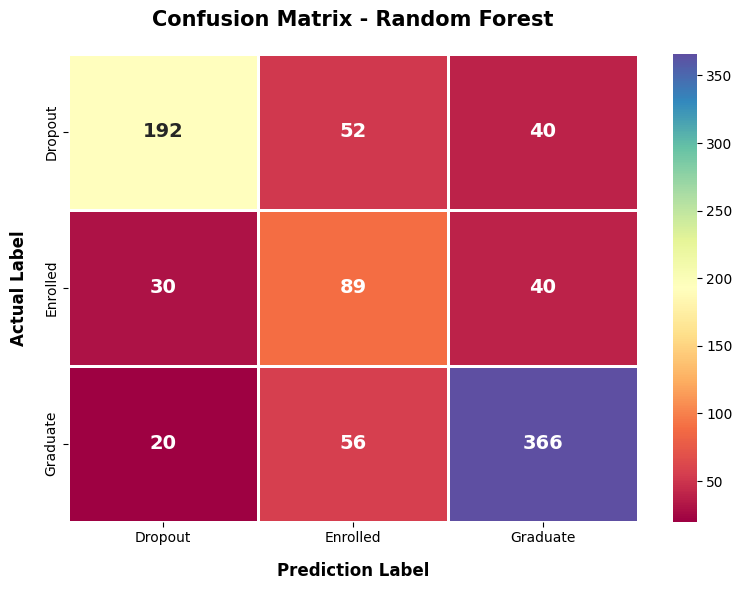

In [92]:
# --- 1. Menampilkan hasil classification report dari algoritma RandomForest ---
print("\n" + "="*55)
print("             Classification Report Random Forest")
print("="*55)
print(classification_report(y_test_text, y_test_pred_rdf))
print("="*55)

# --- 2. Menghitung Confusion Matrix - RandomForest ---
cm = confusion_matrix(y_test_text, y_test_pred_rdf)

# --- 3. Membuat plot menggunakan Seaborn ---
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Spectral', 
            xticklabels=['Dropout', 'Enrolled', 'Graduate' ], 
            yticklabels=['Dropout', 'Enrolled', 'Graduate'],
            linewidths=2, linecolor='white',
            annot_kws={"size": 14, "weight": "bold"}) 

plt.xlabel('Prediction Label', fontsize=12, fontweight='bold', labelpad=12)
plt.ylabel('Actual Label', fontsize=12, fontweight='bold', labelpad=12)
plt.title('Confusion Matrix - Random Forest', fontsize=15, pad=20, fontweight='bold')
plt.tight_layout()
plt.show()


             Classification Report Gradient Boosting
              precision    recall  f1-score   support

     Dropout       0.75      0.69      0.72       284
    Enrolled       0.43      0.38      0.40       159
    Graduate       0.79      0.87      0.83       442

    accuracy                           0.72       885
   macro avg       0.66      0.65      0.65       885
weighted avg       0.71      0.72      0.72       885



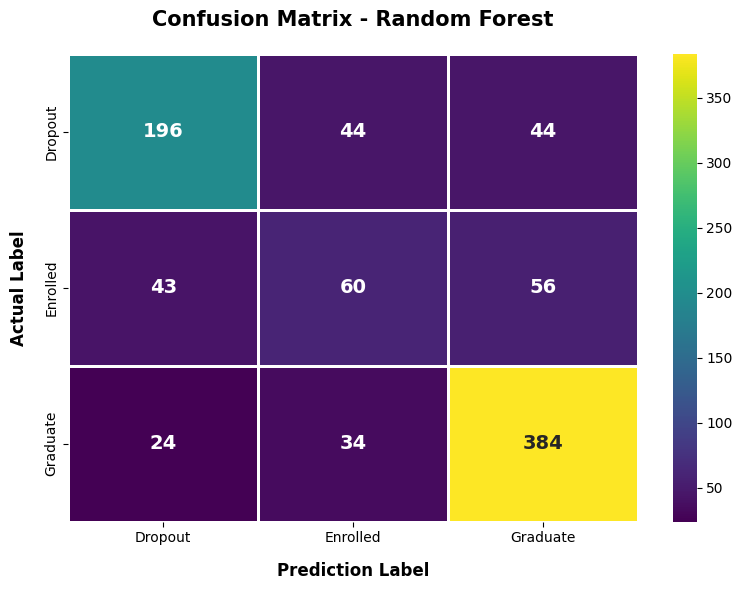

In [93]:
# Menampilkan hasil classification report dari algoritma GradientBoosting
print("\n" + "="*55)
print("             Classification Report Gradient Boosting")
print("="*55)
print(classification_report(y_test_text, y_test_pred_gboost))
print("="*55)

# --- 2. Menghitung Confusion Matrix - GradientBoosting ---
cm = confusion_matrix(y_test_text, y_test_pred_gboost)

# --- 3. Membuat plot menggunakan Seaborn ---
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='viridis', 
            xticklabels=['Dropout', 'Enrolled', 'Graduate' ], 
            yticklabels=['Dropout', 'Enrolled', 'Graduate'],
            linewidths=2, linecolor='white',
            annot_kws={"size": 14, "weight": "bold"}) 

plt.xlabel('Prediction Label', fontsize=12, fontweight='bold', labelpad=12)
plt.ylabel('Actual Label', fontsize=12, fontweight='bold', labelpad=12)
plt.title('Confusion Matrix - Random Forest', fontsize=15, pad=20, fontweight='bold')
plt.tight_layout()
plt.show() 

In [101]:
# Create name folder 'model'
os.makedirs('model')
# Gabungkan path
model_path = os.path.join('model', 'rdf_model.pkl')
# Save model
joblib.dump(rdf_model, model_path)

['model\\rdf_model.pkl']